In [1]:
!git clone https://github.com/Ashutosh-Vermaa/Machine-Learning-Projects.git

Cloning into 'Machine-Learning-Projects'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 141 (delta 13), reused 7 (delta 7), pack-reused 125
Receiving objects: 100% (141/141), 2.52 MiB | 6.57 MiB/s, done.
Resolving deltas: 100% (58/58), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
# import 

In [3]:
data=pd.read_csv('/content/Machine-Learning-Projects/Insurance Premium Prediction/insurance_premium Prediction Dataset.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data Cleansing

In [5]:
data.sex.unique() #there are two unique values in sex column

array(['female', 'male'], dtype=object)

In [6]:
data.smoker.unique() #two unique values in smoker column

array(['yes', 'no'], dtype=object)

In [7]:
data.info() #there are 1338 records with 7 columns . No null values in the dataset. Other than numerical datatype, there is object datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isnull().sum(axis=0) #there are no null values in any of the columns

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [9]:
data[data.duplicated()] #there is one dupicate entry

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [10]:
data= data.drop_duplicates()

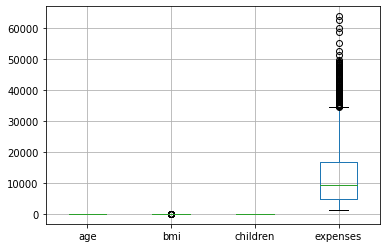

In [11]:
data.boxplot() 

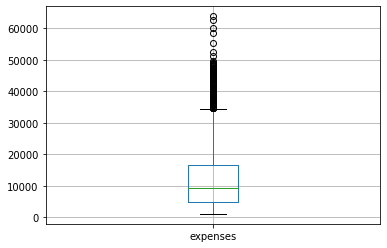

In [12]:
pd.DataFrame(data['expenses']).boxplot()

We can see that there are outliers in the expenses column. Since the outlier values are sparse above 50k, we will remove those

In [13]:
data= data[data['expenses']<=50000] 

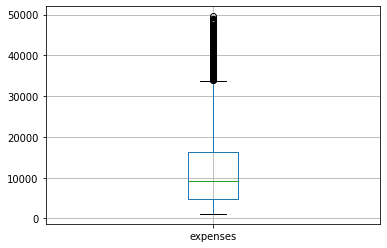

In [14]:
pd.DataFrame(data['expenses']).boxplot()

In [15]:
data['sex']= data.sex.replace({'female': 1, 'male' :0}) #replacing the texts in the two columns by numbers 
data['smoker']= data.smoker.replace({'yes':1, "no":0})

<ipython-input-15-58feaf053aba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex']= data.sex.replace({'female': 1, 'male' :0}) #replacing the texts in the two columns by numbers
<ipython-input-15-58feaf053aba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['smoker']= data.smoker.replace({'yes':1, "no":0})


In [16]:
data_dummy= pd.get_dummies(data) #replaces the categorical values with 0 or 1

data_dummy.head() 

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,0,0,0,1
1,18,0,33.8,1,0,1725.55,0,0,1,0
2,28,0,33.0,3,0,4449.46,0,0,1,0
3,33,0,22.7,0,0,21984.47,0,1,0,0
4,32,0,28.9,0,0,3866.86,0,1,0,0


## Exploratory Data Analysis

In [17]:
data.shape

(1330, 7)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   int64  
 1   sex       1330 non-null   int64  
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   int64  
 4   smoker    1330 non-null   int64  
 5   region    1330 non-null   object 
 6   expenses  1330 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.1+ KB


In [19]:
data.describe()

,age,sex,bmi,children,smoker,expenses
count,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,39.200752,0.495489,30.635113,1.097744,0.200752,13045.345165
std,14.052396,0.500168,6.091307,1.206108,0.400713,11699.581614
min,18.000000,0.000000,16.000000,0.000000,0.000000,1121.870000
25%,26.250000,0.000000,26.200000,0.000000,0.000000,4724.372500
50%,39.000000,0.000000,30.300000,1.000000,0.000000,9303.295000
75%,51.000000,1.000000,34.600000,2.000000,0.000000,16389.830000
max,64.000000,1.000000,53.100000,5.000000,1.000000,49577.660000


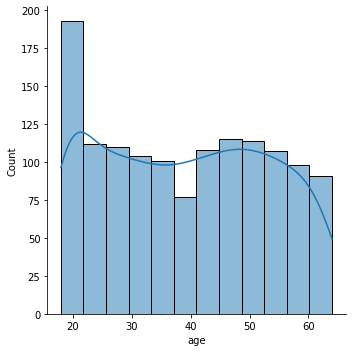

In [20]:
#sns.countplot(), sns.set_style()
sns.displot(data.age, kde=True)

Text(0, 0.5, 'Average expenditure ')

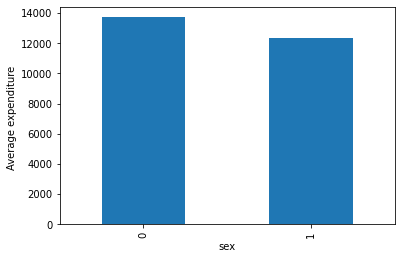

In [21]:
data.groupby(['sex'])['expenses'].mean().plot.bar()
plt.ylabel('Average expenditure ')


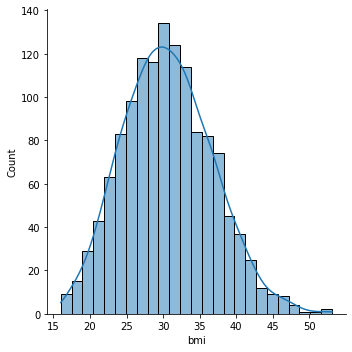

In [22]:
sns.displot(data['bmi'], kde=True) #it is normally distributed

Text(0, 0.5, 'Average Expenditure')

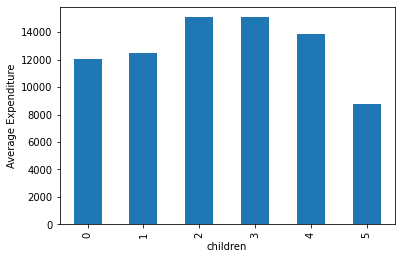

In [23]:
data.groupby(['children'])['expenses'].mean().plot.bar()
plt.ylabel('Average Expenditure')

Text(0, 0.5, 'Average Expenditure')

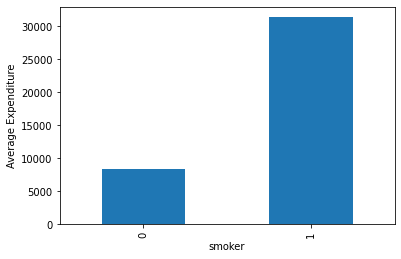

In [24]:
data.groupby(['smoker'])['expenses'].mean().plot.bar()
plt.ylabel('Average Expenditure')

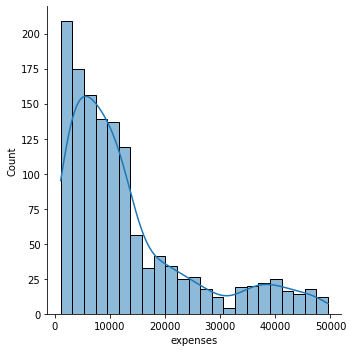

In [25]:
sns.displot(data.expenses, kde=True) #right skewed

<Figure size 720x1080 with 0 Axes>

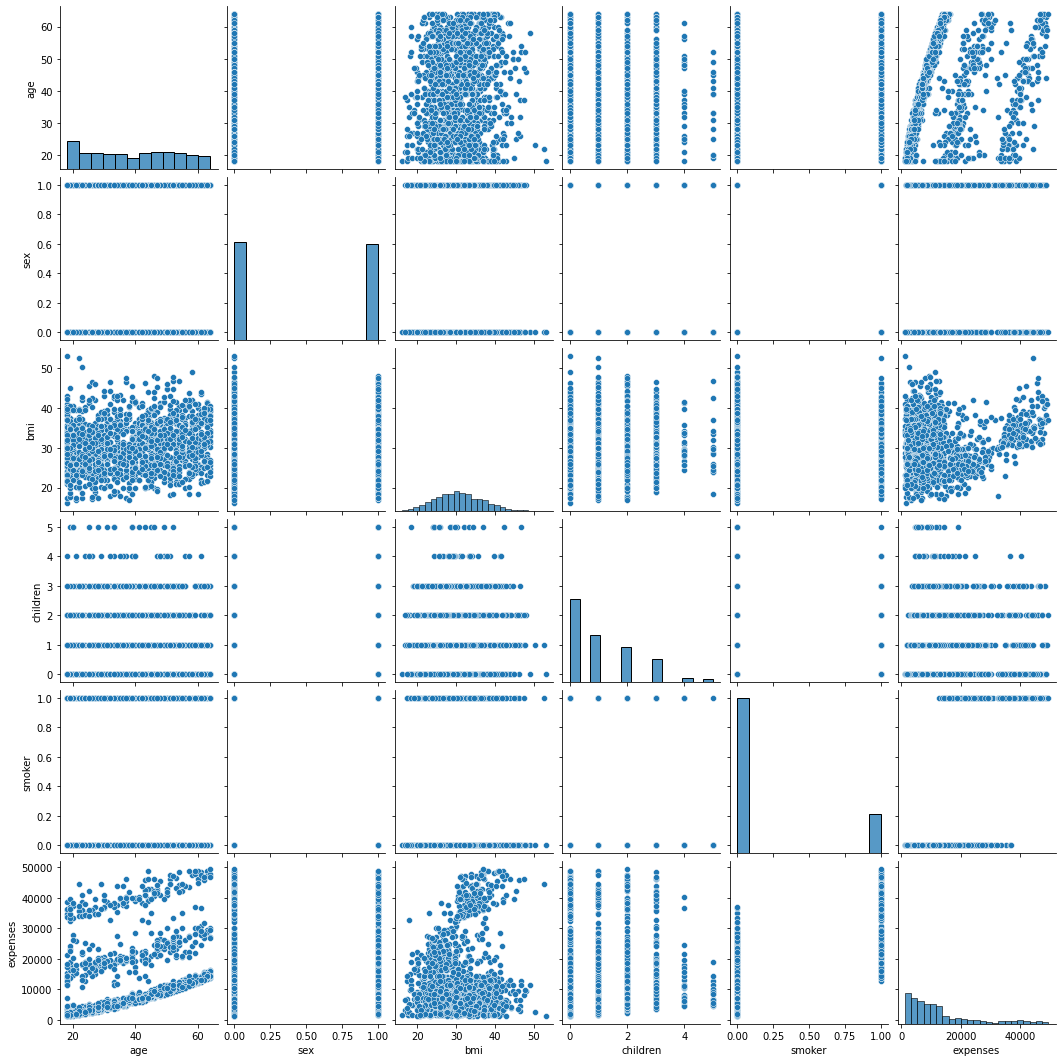

In [26]:
plt.figure(figsize=(10,15))
sns.pairplot(data)

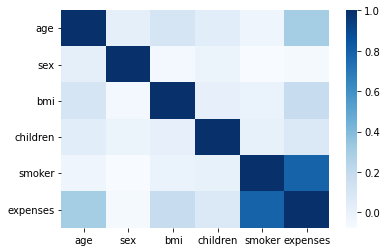

In [27]:
corr= data.corr() 
corr.style.background_gradient(cmap='coolwarm')
plt.figure(figsize=(6,4))
sns.heatmap(data.corr(),cmap='Blues',annot=False)

The above correlation matrix shows that smoker and expenses/premium cost are highly correlated. age and premium cost are well correlated followed by bmi and premium cost. Moreover, age and bmi are slightly correlated.






## Model Building and Training

In [28]:
# sns.pairplot(data, hue='expenses')

In [29]:
y=data_dummy['expenses']
data_dummy=data_dummy.drop('expenses', axis=1)

In [30]:
x=data_dummy

In [31]:
from sklearn.preprocessing import StandardScaler
x_scaled = StandardScaler().fit_transform(x)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x_scaled, y, test_size=0.2,random_state=43)

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(x_train, y_train)

In [34]:
pred=reg.predict(x_test)

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(mean_squared_error(pred, y_test))
print(mean_absolute_error(pred, y_test))

33387763.913954325
3972.835488721805


In [36]:
reg.score(x_test,y_test) # the model is able to predict the results with an accuracy of 78%

0.7824940343770173

In [37]:
x_train.shape[1]

9

##Decision Tree Regressor

In [38]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(x_train, y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_test, regressor.predict(x_test)) #model predicts the value with 71% accuracy

0.7104298703686108